In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [10]:
path1='Panorama1.jpg'
path2='Panorama2.jpg'

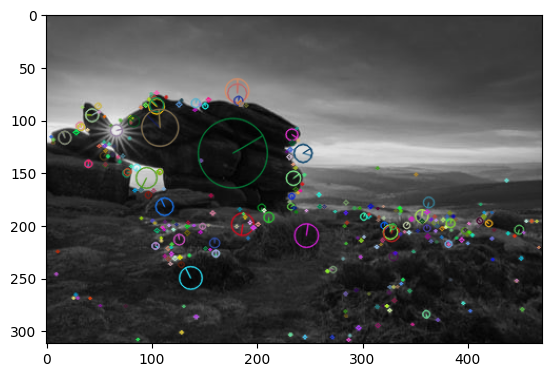

In [11]:
img = cv.imread(path1)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Áp dụng đặc trưng SIFT
sift = cv.SIFT_create()
kp = sift.detect(gray, None)

# vẽ lên các key point
img=cv.drawKeypoints(gray ,
					kp ,
					img ,
					flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)


In [29]:
def sortmatch(descrip1,descrip2):
    bf = cv.BFMatcher()

    # lấy ra các điểm giống nhau tiền năng của 2 ảnh
    matches = bf.match(descrip1,descrip2)

    # sắp xếp lại các điểm trong match dựa theo độ xa
    matches = sorted(matches, key=lambda val: val.distance)

    return matches

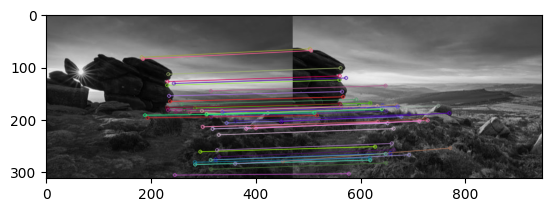

(<matplotlib.image.AxesImage at 0x254ca63d050>, None)

In [30]:
img1 = cv.imread(path1,0)
img2 = cv.imread(path2,0)

sift = cv.SIFT_create()

# dùng sift lấy ra các điểm key point
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# đưa các key point vào để lọc và lấy ra các key point giống nhau tiềng năng
matches=sortmatch(des1,des2)

# vẽ lên ảnh 50 key point tiền năng nhất
out = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

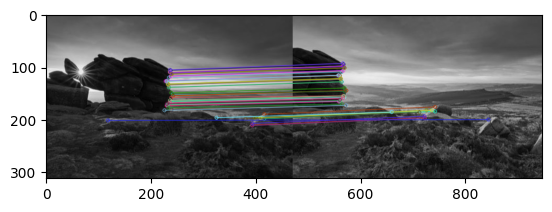

(<matplotlib.image.AxesImage at 0x254ce2c4210>, None)

In [33]:
img1 = cv.imread(path1,0)
img2 = cv.imread(path2,0)

detect = cv.ORB_create()
# dùng ORB lấy ra các điểm key point
key_point1,descrip1 = detect.detectAndCompute(img1,None)
key_point2,descrip2 = detect.detectAndCompute(img2,None)


matches=sortmatch(descrip1,descrip2)

out = cv.drawMatches(img1, key_point1, img2, key_point2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

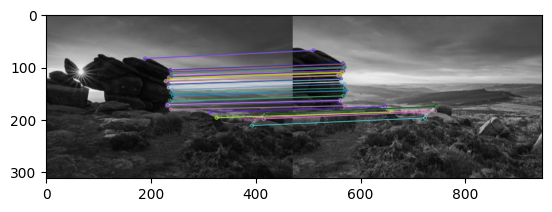

(<matplotlib.image.AxesImage at 0x254ca83a410>, None)

In [37]:
img1 = cv.imread(path1,0)
img2 = cv.imread(path2,0)
orb = cv.ORB_create()

# dùng ORB lấy ra các điểm key point
key_point1,descrip1 = orb.detectAndCompute(img1,None)
key_point2,descrip2 = orb.detectAndCompute(img2,None)

def BF_FeatureMatcher(des1,des2):
    brute_force = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
    no_of_matches = brute_force.match(des1,des2)
 
    no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
    return no_of_matches

# dùng BF_FeatureMatcher ngoài cv.NORM_HAMMING là kiểm tra khoản cách thì dùng thêm
# crosscheck=True để kiểm tra chéo chắc chắn 2 bên đều khớp
matches=BF_FeatureMatcher(descrip1,descrip2)

out = cv.drawMatches(img1, key_point1, img2, key_point2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

Your Panorama is ready!!!


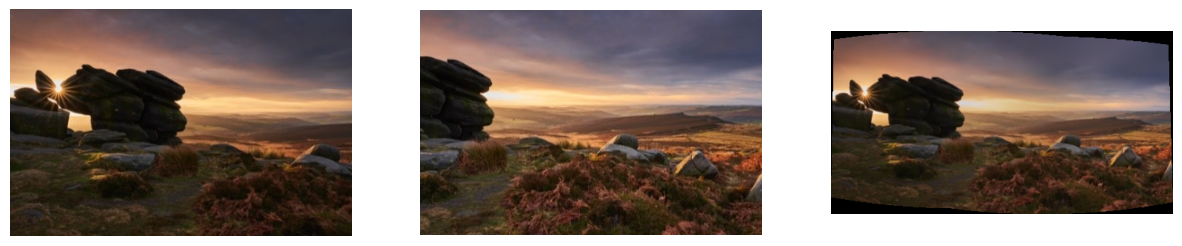

In [59]:
# Hàm ghép ảnh
def Panorama_Stitching(allpath):
	imgs = [] 
	for i in range(len(allpath)): 
		imgs.append(cv.cvtColor(cv.imread(allpath[i]),cv.COLOR_BGR2RGB))
		imgs[i]=cv.resize(imgs[i],(0,0),fx=0.8,fy=0.8) 
	# tạo Stitcher ghép ảnh
	stitchy=cv.Stitcher.create() 
	# Stitcher ghép array các ảnh nếu có thể và tạo ra ảnh mới
	(dummy,output)=stitchy.stitch(imgs)

	return dummy,output,imgs



image_paths=[path1,path2] 

(dummy,output,imgs)=Panorama_Stitching(image_paths)

if dummy != cv.STITCHER_OK: 

	print("stitching ain't successful") 
else: 
	print('Your Panorama is ready!!!') 

fig, axs = plt.subplots(1, 3,figsize=(15, 8))
for ax in axs.ravel():
    ax.set_axis_off()
plt.subplot(1,3,1)
plt.imshow(imgs[0])
plt.subplot(1,3,2)
plt.imshow(imgs[1])
plt.subplot(1,3,3)
plt.imshow(output)

Your Panorama is ready!!!


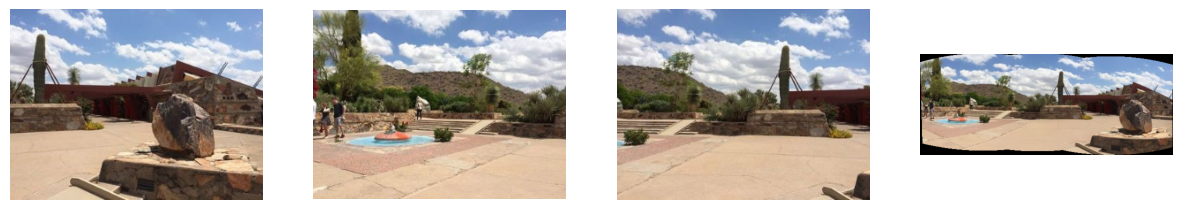

In [60]:
image_paths=['Panorama3.jpg','Panorama4.jpg','Panorama5.jpg'] 

(dummy,output,imgs)=Panorama_Stitching(image_paths)
if dummy != cv.STITCHER_OK: 

	print("stitching ain't successful") 
else: 
	print('Your Panorama is ready!!!') 

fig, axs = plt.subplots(1, 4,figsize=(15, 8))
for ax in axs.ravel():
    ax.set_axis_off()
plt.subplot(1,4,1)
plt.imshow(imgs[0])
plt.subplot(1,4,2)
plt.imshow(imgs[1])
plt.subplot(1,4,3)
plt.imshow(imgs[2])
plt.subplot(1,4,4)
plt.imshow(output)

Your Panorama is ready!!!


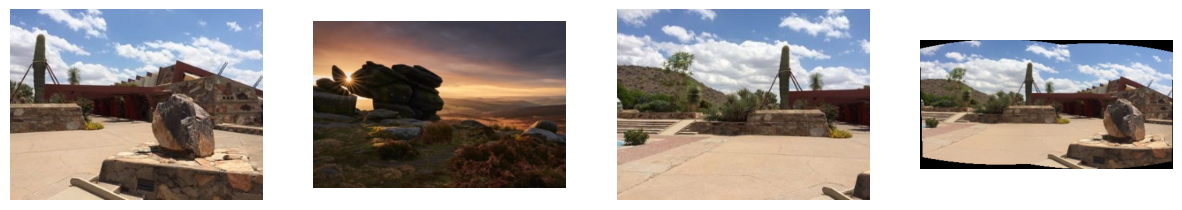

In [65]:
image_paths=['Panorama3.jpg','Panorama1.jpg','Panorama5.jpg'] 

(dummy,output,imgs)=Panorama_Stitching(image_paths)
if dummy != cv.STITCHER_OK: 

	print("stitching ain't successful") 
else: 
	print('Your Panorama is ready!!!') 

fig, axs = plt.subplots(1, 4,figsize=(15, 8))
for ax in axs.ravel():
    ax.set_axis_off()
plt.subplot(1,4,1)
plt.imshow(imgs[0])
plt.subplot(1,4,2)
plt.imshow(imgs[1])
plt.subplot(1,4,3)
plt.imshow(imgs[2])
plt.subplot(1,4,4)
plt.imshow(output)

Your Panorama is ready!!!


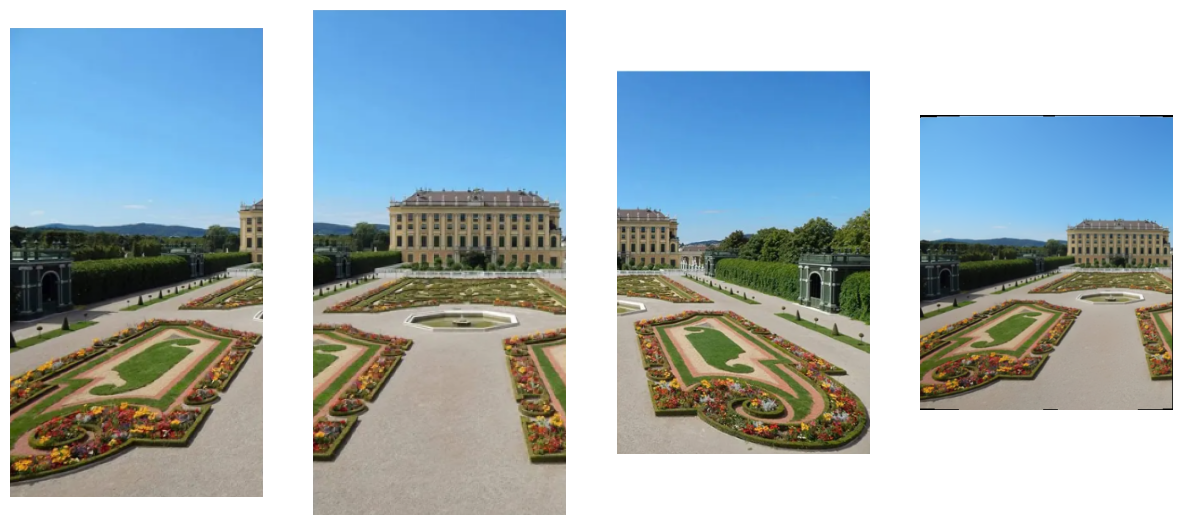

In [70]:
image_paths=['Panorama6.png','Panorama7.png','Panorama8.png'] 

(dummy,output,imgs)=Panorama_Stitching(image_paths)
if dummy != cv.STITCHER_OK: 

	print("stitching ain't successful") 
else: 
	print('Your Panorama is ready!!!') 

fig, axs = plt.subplots(1, 4,figsize=(15, 8))
for ax in axs.ravel():
    ax.set_axis_off()
plt.subplot(1,4,1)
plt.imshow(imgs[0])
plt.subplot(1,4,2)
plt.imshow(imgs[1])
plt.subplot(1,4,3)
plt.imshow(imgs[2])
plt.subplot(1,4,4)
plt.imshow(output)

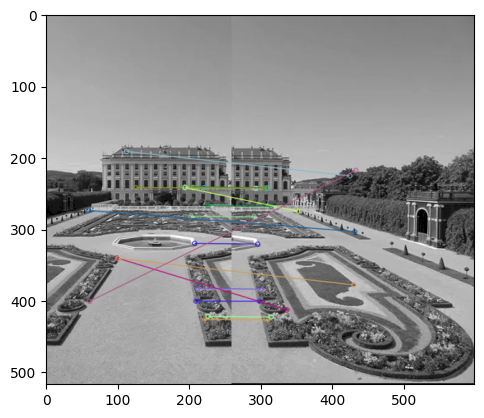

(<matplotlib.image.AxesImage at 0x254d6ea6110>, None)

In [74]:
img1 = cv.imread('Panorama7.png',0)
img2 = cv.imread('Panorama8.png',0)
orb = cv.ORB_create()

key_point1,descrip1 = orb.detectAndCompute(img1,None)
key_point2,descrip2 = orb.detectAndCompute(img2,None)

def BF_FeatureMatcher(des1,des2):
    brute_force = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
    no_of_matches = brute_force.match(des1,des2)
 
    no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
    return no_of_matches

matches=BF_FeatureMatcher(descrip1,descrip2)

out = cv.drawMatches(img1, key_point1, img2, key_point2, matches[:20], None, flags=2)
plt.imshow(out), plt.show()

In [81]:
def warpImages(img1, img2, H):

  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
  
  translation_dist = [-x_min,-y_min]
  
  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv.warpPerspective(img2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

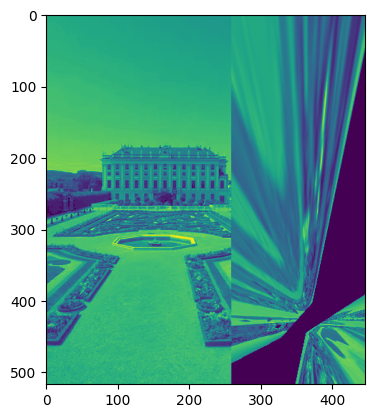

In [97]:
img1 = cv.imread('Panorama7.png',0)
img2 = cv.imread('Panorama8.png',0)
orb = cv.ORB_create()

key_point1,descrip1 = orb.detectAndCompute(img1,None)
key_point2,descrip2 = orb.detectAndCompute(img2,None)

bf = cv.BFMatcher_create(cv.NORM_HAMMING)

# Find matching points
matches = bf.knnMatch(descrip1, descrip2,k=2)

# out = cv.drawMatches(img1, key_point1, img2, key_point2, matches[:20], None, flags=2)
# plt.imshow(out), plt.show()
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

src_pts = np.float32([key_point1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([key_point2[m.queryIdx].pt for m in good]).reshape(-1,1,2)

M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)

result = warpImages(img1, img2, M)
plt.imshow(result)

In [95]:
len(good)

12